In [33]:
import sys; sys.path.append('..')

import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as pjoin
import torch.nn.functional as F

from src.visualize import visualize_fc_weights


In [2]:
dict_type = "gabor"
patch_height = 12
patch_width = 12
m = 40
L = 8
inc = 3.5

dict_loc = f"{dict_type}_{patch_width}x{patch_height}_m={m}_L={L}_inc={inc}.pt"

seed = 1
k = 10
noise = 0.0
width = 40
bs = 32
sigma = 0.5
act = "ReLU"
tied = True
lr = 2
alg = "sgd"

data_dir = f"{dict_loc}_k={k}_noise={noise}"
arch_dir = f"fc_width={width}_act={act}_tied={tied}"


In [3]:
def get_weights_loc(epoch):
    exp_dir = f"fc_{alg}_lr={lr}_bs={bs}_sigma={sigma}_epoch={epoch}_seed={seed}.pt"
    weights_loc = pjoin("../saved_weights", data_dir, arch_dir, exp_dir)
    return weights_loc

def get_dict_loc():
    return pjoin("../dictionaries", dict_loc)

def corr_mat(X, Y):
    return F.normalize(X) @ F.normalize(Y).T

In [4]:
print(get_weights_loc(0))
print(get_dict_loc())

../saved_weights/gabor_12x12_m=40_L=8_inc=3.5.pt_k=10_noise=0.0/fc_width=40_act=ReLU_tied=True/fc_sgd_lr=2_bs=32_sigma=0.5_epoch=0_seed=1.pt
../dictionaries/gabor_12x12_m=40_L=8_inc=3.5.pt


In [5]:
W0 = torch.load(get_weights_loc(0), map_location=torch.device("cpu"))['W']
W1 = torch.load(get_weights_loc(1), map_location=torch.device("cpu"))['W']
dictionary = torch.load(get_dict_loc())

corr0 = corr_mat(dictionary, W0)
corr1 = corr_mat(dictionary, W1)


In [6]:
count = 0
for i in range(m):
    amax = torch.argmax(torch.abs(corr1[i]))
    if corr1[i][amax] > 0.95:
        count += 1
print(count)

40


tensor(36) tensor(0.1543) tensor(-0.0123)
tensor(20) tensor(-0.1211) tensor(0.9930)


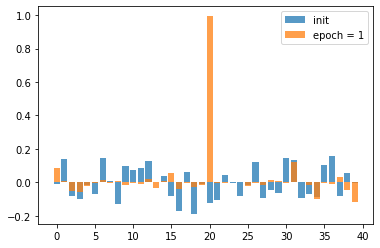

In [43]:
# j = 29, 34
j = 29

plt.bar(np.arange(m), corr0[j].numpy(), alpha=0.75, label="init")
plt.bar(np.arange(m), corr1[j].numpy(), alpha=0.75, label="epoch = 1")
plt.legend()

amax0 = torch.argmax(corr0[j])
amax1 = torch.argmax(corr1[j])

print(amax0, corr0[j][amax0], corr1[j][amax0])
print(amax1, corr0[j][amax1], corr1[j][amax1])

In [41]:
pos_ranks = torch.zeros(m)
neg_ranks = torch.zeros(m)
abs_ranks = torch.zeros(m)

for j in range(m):
    amax1 = torch.argmax(corr1[j])
    val = corr0[j][amax1]
    pos_ranks[j] = torch.mean((val >= corr0[j]).float())
    neg_ranks[j] = torch.mean((val <= corr0[j]).float())
    abs_ranks[j] = torch.mean((torch.abs(val) >= torch.abs(corr0[j])).float())

print(pos_ranks)
print(neg_ranks)
print(torch.maximum(pos_ranks, neg_ranks))
print(abs_ranks)

j_star = torch.argmin(abs_ranks)
print(j_star)


tensor([0.9750, 0.2000, 0.9500, 0.9000, 1.0000, 0.9500, 0.9000, 1.0000, 0.9750,
        1.0000, 1.0000, 1.0000, 1.0000, 0.8500, 1.0000, 0.9750, 1.0000, 1.0000,
        0.9750, 0.9250, 0.8750, 0.9750, 1.0000, 1.0000, 0.9250, 0.9750, 0.9750,
        0.9500, 1.0000, 0.1000, 0.9750, 0.9500, 0.8000, 0.9000, 0.6750, 0.8500,
        1.0000, 1.0000, 0.9750, 0.9000])
tensor([0.0500, 0.8250, 0.0750, 0.1250, 0.0250, 0.0750, 0.1250, 0.0250, 0.0500,
        0.0250, 0.0250, 0.0250, 0.0250, 0.1750, 0.0250, 0.0500, 0.0250, 0.0250,
        0.0500, 0.1000, 0.1500, 0.0500, 0.0250, 0.0250, 0.1000, 0.0500, 0.0500,
        0.0750, 0.0250, 0.9250, 0.0500, 0.0750, 0.2250, 0.1250, 0.3500, 0.1750,
        0.0250, 0.0250, 0.0500, 0.1250])
tensor([0.9750, 0.8250, 0.9500, 0.9000, 1.0000, 0.9500, 0.9000, 1.0000, 0.9750,
        1.0000, 1.0000, 1.0000, 1.0000, 0.8500, 1.0000, 0.9750, 1.0000, 1.0000,
        0.9750, 0.9250, 0.8750, 0.9750, 1.0000, 1.0000, 0.9250, 0.9750, 0.9750,
        0.9500, 1.0000, 0.9250, 0.9750